In [1]:
import groggy as gr
import json

<IPython.core.display.Javascript object>

In [2]:
# Streamlined API Meta-Graph Creation
# This replaces the complex 3-step process with a single focused extraction

import sys
sys.path.append('.')

# Import our streamlined extractor
from api_meta_graph_extractor import APIMetaGraphExtractor

# Create the extractor
extractor = APIMetaGraphExtractor()

# Extract the complete meta-graph
print("Starting API Meta-Graph extraction...")
meta_graph, summary = extractor.extract_complete_meta_graph()

print(f"\n🎉 Successfully created meta-graph!")
print(f"   Nodes (Types): {summary['meta_graph_stats']['nodes']}")
print(f"   Edges (Methods): {summary['meta_graph_stats']['edges']}")
print(f"   Types discovered: {summary['meta_graph_stats']['types_discovered']}")

# Show the graph structure
print(f"\nGraph object: {meta_graph}")
print(f"Node count: {meta_graph.node_count()}")
print(f"Edge count: {meta_graph.edge_count()}")

Starting API Meta-Graph extraction...
API Meta-Graph Extraction
Discovering Groggy API structure...
  Checking groggy module for available types...
    Found AggregationFunction class (could not instantiate)
    Found AggregationResult class (could not instantiate)
    Created AttrName instance
    Found AttrValue class (could not instantiate)
    Found AttributeFilter class (could not instantiate)
    Found BaseArray class (could not instantiate)
    Created BaseTable instance
    Found BranchInfo class (could not instantiate)
    Created BranchName instance
    Found Commit class (could not instantiate)
    Found ComponentsArray class (could not instantiate)
    Created DisplayConfig instance
    Found EdgeFilter class (could not instantiate)
    Created EdgeId instance
    Found EdgeNotFoundError class (could not instantiate)
    Found EdgesArray class (could not instantiate)
    Found EdgesTable class (could not instantiate)
    Found GraphMatrix class (could not instantiate)
    F

In [3]:
meta_graph.nodes.table()

NodesTable[34 x 8]

In [4]:
meta_graph.edges.table().column_names

['doc',
 'edge_id',
 'enhanced_signature',
 'is_property',
 'method_full_name',
 'name',
 'object_type',
 'parameter_types',
 'parameters_count',
 'relationship',
 'requires_parameters',
 'return_type',
 'signature',
 'source',
 'source_object',
 'source_type',
 'target']

In [5]:
meta_graph.edges.table()

EdgesTable[469 x 17]

In [6]:
meta_graph.edges.table()[['name', 'source_type', 'return_type']]

edge_id,source,target,name,source_type,return_type
49,26,18,set_edge_attrs,Graph,GraphAttrMut
362,25,25,out_degree,Subgraph,Subgraph
422,22,23,norm_l1,GraphMatrix,Matrix
7,26,26,all_node_attribute_names,Graph,Graph
⋮,⋮,⋮,⋮,⋮,⋮
333,25,25,contains_node,Subgraph,Subgraph
220,6,6,from_csv,NodesTable,NodesTable
391,22,23,filter,GraphMatrix,Matrix
63,31,33,isalnum,AttrName,str


In [7]:
meta_graph.edges[meta_graph.edges['source_type'] == 'GraphMatrix'].edges.table()[['name', 'source_type', 'return_type']]

edge_id,source,target,name,source_type,return_type
381,22,11,cholesky_decomposition,GraphMatrix,Unknown
400,22,0,get_column,GraphMatrix,BaseArray
414,22,11,max_axis,GraphMatrix,Unknown
439,22,11,sqrt,GraphMatrix,Unknown
⋮,⋮,⋮,⋮,⋮,⋮
450,22,28,to_dict,GraphMatrix,dict
407,22,11,iter_columns,GraphMatrix,Unknown
384,22,11,dense_html_repr,GraphMatrix,Unknown
417,22,23,min,GraphMatrix,Matrix


In [8]:
# Access nodes table properly
try:
    nodes_table = meta_graph.nodes()
    print(f"Nodes table shape: {nodes_table.shape()}")
    print("\nFirst 5 type nodes:")
    nodes_table.head(5)
except Exception as e:
    print(f"Error accessing nodes: {e}")
    print("Showing discovered types from summary instead:")
    for i, type_name in enumerate(sorted(summary['discovery_data']['types'])[:5]):
        status = "Core" if type_name in summary['type_info'] else "Inferred"
        print(f"  {i+1}. {type_name} ({status})")

Error accessing nodes: 'builtins.NodesAccessor' object is not callable
Showing discovered types from summary instead:
  1. AttrName (Core)
  2. BaseArray (Inferred)
  3. BaseTable (Core)
  4. BranchName (Core)
  5. Commit (Inferred)


In [9]:
meta_graph.edges.group_by('source_object')[7].edges.table()

EdgesTable[35 x 17]

In [10]:
meta_graph.edges['source_object'].unique()

index,value
0,Graph
1,Subgraph
2,GraphMatrix
3,NodesTable
⋮,⋮
17,EdgeId
18,TableArray
19,NodeId
20,DisplayConfig


In [11]:
meta_graph.edges[meta_graph.edges['source_object'] == 'GraphTable'].edges.table()['return_type'].unique()

index,value
0,Unknown
1,GraphTable
2,float
3,Graph
4,SubgraphArray
5,dict
6,EdgesAccessor
7,NodesAccessor


In [12]:
meta_graph.edges[meta_graph.edges['source_object'] == 'NumArray'].edges.table()['return_type'].unique()

index,value
0,Unknown
1,NumArray
2,list
3,float


In [13]:
gr.array(meta_graph.edges[meta_graph.edges['source_object'] == 'NumArray'].nodes.ids())

index,value
0,10
1,11
2,30
3,5


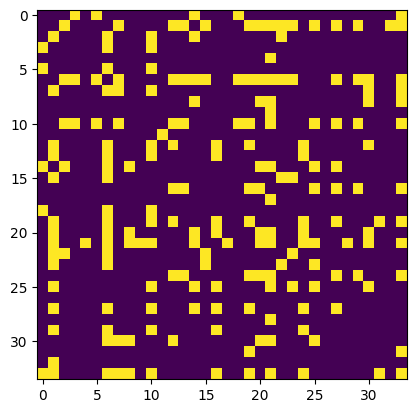

In [14]:
import matplotlib.pyplot as plt

plt.imshow(meta_graph.adj().data)

In [15]:
# meta_graph.viz().widget()

In [16]:
# meta_graph.viz().render(backend='file', filename='/Users/michaelroth/Documents/Code/groggy/output.html')

In [17]:
meta_graph.viz.show(backend='jupyter')

GROGGY DEBUG: GraphDataSource::new called with 34 nodes
🔍 Node 32: Found 0 attributes
❌ No 'name' attribute found for node 32, available attrs: ["color", "size"]
🔍 Node 5: Found 4 attributes
🔍   description = CompactText(Inline { data: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], len: 0 })
🔍   type_name = CompactText(Inline { data: [108, 105, 115, 116, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], len: 4 })
🔍   methods_count = SmallInt(0)
🔍   category = CompactText(Inline { data: [105, 110, 102, 101, 114, 114, 101, 100, 0, 0, 0, 0, 0, 0, 0], len: 8 })
❌ No 'name' attribute found for node 5, available attrs: ["category", "type_name", "description", "methods_count", "color", "size"]
🔍 Node 30: Found 4 attributes
🔍   description = CompactText(Inline { data: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], len: 0 })
🔍   category = CompactText(Inline { data: [105, 110, 102, 101, 114, 114, 101, 100, 0, 0, 0, 0, 0, 0, 0], len: 8 })
🔍   type_name = CompactText(Inline { data: [102, 108, 111, 97, 116, 0, 0,

'<iframe src="http://127.0.0.1:60085" width="100%" height="420" style="border:0;border-radius:12px;"></iframe>'

 'name' attribute found for node 21, available attrs: ["color", "size"]
🔍 Node 31: Found 7 attributes
🔍   methods_count = SmallInt(37)
🔍   module = CompactText(Inline { data: [98, 117, 105, 108, 116, 105, 110, 115, 0, 0, 0, 0, 0, 0, 0], len: 8 })
🔍   description = CompactText(Inline { data: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], len: 0 })
🔍   class_name = CompactText(Inline { data: [115, 116, 114, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], len: 3 })
🔍   docstring = CompressedText(CompressedData { data: [115, 116, 114, 40, 111, 98, 106, 101, 99, 116, 61, 39, 39, 41, 32, 45, 62, 32, 115, 116, 114, 10, 115, 116, 114, 40, 98, 121, 116, 101, 115, 95, 111, 114, 95, 98, 117, 102, 102, 101, 114, 91, 44, 32, 101, 110, 99, 111, 100, 105, 110, 103, 91, 44, 32, 101, 114, 114, 111, 114, 115, 93, 93, 41, 32, 45, 62, 32, 115, 116, 114, 10, 10, 67, 114, 101, 97, 116, 101, 32, 97, 32, 110, 101, 119, 32, 115, 116, 114, 105, 110, 103, 32, 111, 98, 106, 101, 99, 116, 32, 102, 114, 111, 109, 32, 116, 104